# Error en potencia con disco filtro continuo
Determinación del error cometido en la potencia promedio al usar un filtro neutro de densidad óptica continua.

Por: Edgar Rueda, julio 2022

```{note}
Prueba de que actualizó.
```

#### Problema
Se tiene un haz de perfil de irradiancia Gaussiano que incide sobre un disco filtro neutro que varía su densidad óptica en función del ángulo. El haz Gaussiano está centrado en el sistema coordenado (x',y'), y el disco neutro está centrado en el sistema coordenado (X,Y), como se observa en la figura.

![EsquemaPot.png](../Imagenes/EsquemaPot.png)

La función que gobierna la densidad óptica es:

$$F(\alpha) = 10^{-m\alpha}$$

donde $m$ es un parámetro del disco que indica la razón de cambio de la densidad óptica, y es particular de cada referencia.

Para la potencia promedio del haz la aproximación que se hace es suponer que la densidad óptica es constante sobre todo el haz, y que solo depende del ángulo $\theta$. No obstante, la densidad óptica realmente está cambiando sobre el haz, por lo que se busca saber cuanto es el error en el que se está incurriendo.

#### Solución
Para resolver este problema el objetivo será escribir tanto la irradiancia del haz como el efecto del filtro en función de los ángulos $\varphi$ y $\theta$, y de los radios $r$ y $R$.

De la figura se tiene que

$$ x' = X -R\cos\theta = r'\cos\alpha - R\cos\theta = r\cos\varphi $$
$$ y' = Y -R\sin\theta = r'\sin\alpha - R\sin\theta = r\sin\varphi $$

Dividiendo la segunda ecuación respecto a la primera se obtiene:

$$ \tan\alpha = \frac{r\sin\varphi + R\sin\theta}{r\cos\varphi + R\cos\theta} \quad (1)$$

Esta ecuación es clave porque escribe la función del filtro en términos de las coordenadas (x',y'), donde es más fácil calcular todo puesto que los límites de integración están muy bien definidos y siempre son los mismos.

Tenemos entonces la irradiancia:

$$ I(r) = I_0 \exp{(-2r^2/w_0^2)} \quad (2)$$

donde $w_0$ es el radio de la cintura del haz, e $I_0$ es la irradiancia máxima. La expresión para el filtro usando la ec. (1) será:

$$F(r,\varphi) = 10^{-m\alpha(r,\varphi;R,\theta)}$$

Y la potencia para cualquier posición del haz Gaussiano sobre el disco será:

$$ P(R,\theta) = \int_0^{\infty} \ r d r\int_0^{2\pi} d\varphi F(r,\varphi)I(r) $$

**Caso 1: densidad óptica constante**

Para el caso en que la densidad óptica es constante, y solo depende de $\theta$, la potencia final será:

$$ P(\theta) = 10^{-m\theta} \int_0^{\infty} \ r d r\int_0^{2\pi} d\varphi I(r) = 10^{-m\theta}\frac{I_0\pi w_0^2}{2} $$

**Caso 2: densidad óptica dependiente de $\alpha$**

Para este caso se opta por una integración numérica.

In [1]:
import numpy as np
from scipy.integrate import simps
import pylab as plt

In [2]:
# Irradiancia del haz gaussiano
def Irr(r):
    return I0*np.exp((-2/w0**2)*r**2)

# Filtro neutro
def F(r,phi,R,theta):
    #Se usa arctan2 para que de el resultado correcto, al ser una operación en cuadrantes
    alpha = np.arctan2(r*np.sin(phi)+R*np.sin(theta),r*np.cos(phi)+R*np.cos(theta))
    return 10**(-m*alpha)

In [3]:
def PotF(R,theta):
    # El radio se evalúa hasta 10 veces la cintura del haz, lo que es una buena aproximación
    r = np.linspace(0,10*w0,200)
    aux2 = r*Irr(r)
    Pf = 0
    phi = np.linspace(0,2*np.pi,200)
    for ii in phi:
        aux = F(r,ii,R,theta)*aux2
        R1 = simps(aux,r)
        Pf = Pf + R1
    return Pf*abs(phi[1]-phi[0])

#Pf = PotF(R,theta)
#print(Pf)

In [4]:
theta1 = np.pi/2
m1 = 0.0128
w01=0.1
I01=1
# Valor del caso 1, por si se desea comparar con el valor del caso 2
Pesp = 10**(-m1*theta1)*I01*np.pi*w01**2/2
print(Pesp)

0.014997320893409705


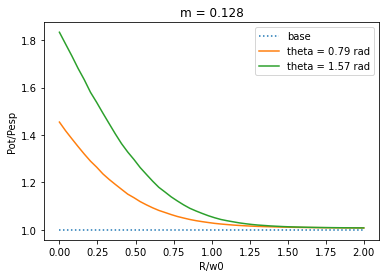

In [5]:
#Parámetros particulares. No obstante el resultado se presenta normalizado con respecto al caso uno por lo
# que los valores particulares no influyen en la conclusión
w0=0.01
I0=1
m=0.128 # Valor del disco de Edmund Optics que se tiene en el laboratorio
R2 = np.linspace(0,2*w0,50)
tang = np.linspace(np.pi/4,np.pi/2,2)
plt.figure()
plt.title(('m = %.3f'%m))
plt.plot(R2/w0,np.ones(len(R2)),ls='dotted',label='base')
for ii in tang:
    Pot = np.zeros(len(R2))
    for jj,kk in enumerate(R2):
         Pot[jj]=PotF(kk,ii)
    Pesp = 10**(-m*ii)*I0*np.pi*w0**2/2
    plt.plot(R2/w0,Pot/Pesp,label=('theta = %.2f rad'%ii))
plt.xlabel('R/w0')
plt.ylabel('Pot/Pesp')
plt.legend()
plt.show()

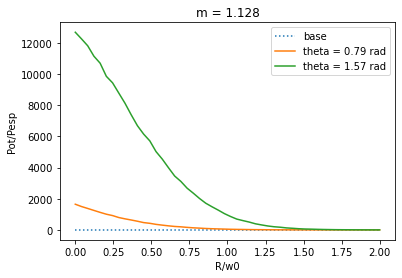

In [6]:
#Parámetros particulares. No obstante el resultado se presenta normalizado con respecto al caso uno por lo
# que los valores particulares no influyen en la conclusión
w0=0.01
I0=1
m=1.128 # Un orden por encima del Valor del disco de Edmund Optics que se tiene en el laboratorio
R2 = np.linspace(0,2*w0,50)
tang = np.linspace(np.pi/4,np.pi/2,2)
plt.figure()
plt.title(('m = %.3f'%m))
plt.plot(R2/w0,np.ones(len(R2)),ls='dotted',label='base')
for ii in tang:
    Pot = np.zeros(len(R2))
    for jj,kk in enumerate(R2):
         Pot[jj]=PotF(kk,ii)
    Pesp = 10**(-m*ii)*I0*np.pi*w0**2/2
    plt.plot(R2/w0,Pot/Pesp,label=('theta = %.2f rad'%ii))
plt.xlabel('R/w0')
plt.ylabel('Pot/Pesp')
plt.legend()
plt.show()

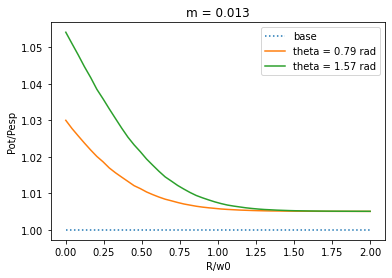

In [7]:
#Parámetros particulares. No obstante el resultado se presenta normalizado con respecto al caso uno por lo
# que los valores particulares no influyen en la conclusión
w0=0.01
I0=1
m=0.0128 # Un orden por debajo del valor del disco de Edmund Optics que se tiene en el laboratorio
R2 = np.linspace(0,2*w0,50)
tang = np.linspace(np.pi/4,np.pi/2,2)
plt.figure()
plt.title(('m = %.3f'%m))
plt.plot(R2/w0,np.ones(len(R2)),ls='dotted',label='base')
for ii in tang:
    Pot = np.zeros(len(R2))
    for jj,kk in enumerate(R2):
         Pot[jj]=PotF(kk,ii)
    Pesp = 10**(-m*ii)*I0*np.pi*w0**2/2
    plt.plot(R2/w0,Pot/Pesp,label=('theta = %.2f rad'%ii))
plt.xlabel('R/w0')
plt.ylabel('Pot/Pesp')
plt.legend()
plt.show()

**Conclusiones**

1. Sin importar los parámetros que se usen se encuentra que no hay efecto en la aproximación cuando el haz se encuentra a dos veces la cintura del haz.
2. Cambiar el valor de $m$ solo modifica la diferencia inicial de la razón de las potencias, pero siempre se iguala con el caso 1 para dos vecces la cintura del haz.

**Perspectiva**

Sugiero crear mapas de irradiancia para ver como cambia la irradiancia, y empezar a mirar si esto puede afectar la propagación del haz. El trabajo final es mirar como se deforma el haz Gaussiano y que implicaciones tiene en el plano de la muestra para generar TPA.